### Modelamiento

Librerias

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt


In [29]:
df = pd.read_csv('data_limpieza.csv')
df = df.head(1000)

In [30]:
df.columns

Index(['PERIODO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO',
       'COLE_CARACTER', 'COLE_DEPTO_UBICACION', 'COLE_GENERO', 'COLE_JORNADA',
       'COLE_MCPIO_UBICACION', 'COLE_NATURALEZA',
       'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 'ESTU_GENERO',
       'ESTU_PRIVADO_LIBERTAD', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE',
       'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET',
       'FAMI_TIENELAVADORA', 'DESEMP_INGLES', 'PUNT_INGLES',
       'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES',
       'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL'],
      dtype='object')

Variables

In [31]:
# Variable de respuesta (última columna)
y = df['PUNT_GLOBAL']

# Variables de entrada (solo las columnas especificadas)
columnas_X = ['PERIODO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO',
       'COLE_CARACTER', 'COLE_DEPTO_UBICACION', 'COLE_GENERO', 'COLE_JORNADA',
       'COLE_MCPIO_UBICACION', 'COLE_NATURALEZA',
       'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 'ESTU_GENERO',
       'ESTU_PRIVADO_LIBERTAD', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE',
       'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET',
       'FAMI_TIENELAVADORA', 'DESEMP_INGLES', 'PUNT_INGLES',
       'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES',
       'PUNT_LECTURA_CRITICA']

X= df[columnas_X]
X

,PERIODO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,...,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA
0,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,MAÑANA,BUCARAMANGA,OFICIAL,...,No,Si,Si,Si,A2,61.0,64,49,59,63
1,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,MAÑANA,BUCARAMANGA,OFICIAL,...,No,Si,Si,Si,A2,61.0,64,49,59,63
2,20192,RURAL,N,A,ACADÉMICO,SANTANDER,MIXTO,MAÑANA,CHARALÁ,OFICIAL,...,No,No,No,Si,A1,54.0,69,55,48,57
3,20192,RURAL,N,A,ACADÉMICO,SANTANDER,MIXTO,MAÑANA,CHARALÁ,OFICIAL,...,No,No,No,Si,A1,54.0,69,55,48,57
4,20192,URBANO,N,A,TÉCNICO,NORTE SANTANDER,MIXTO,ÚNICA,VILLA DEL ROSARIO,OFICIAL,...,Si,Si,Si,Si,A-,37.0,45,50,51,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,TARDE,BUCARAMANGA,OFICIAL,...,No,Si,Si,Si,A2,58.0,59,58,50,52
996,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,TARDE,BUCARAMANGA,OFICIAL,...,No,Si,Si,Si,A2,58.0,59,58,50,52
997,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,MAÑANA,PIEDECUESTA,OFICIAL,...,No,Si,No,Si,B1,75.0,72,64,67,72
998,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,MAÑANA,PIEDECUESTA,OFICIAL,...,No,Si,No,Si,B1,75.0,72,64,67,72


In [34]:
X_enco = pd.get_dummies(X)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_enco, y, test_size=0.2, random_state=42)

In [36]:
import numpy as np

# Convertir los datos de entrenamiento a arrays NumPy y asegurarse de que los tipos sean numéricos
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)


In [37]:
def build_model(activacion, neuronas, input_shape):
    tf.random.set_seed(42)
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(neuronas, activation=activacion,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(neuronas//2, activation=activacion,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

def build_and_train_model(optimizer, activacion, neuronas):
    input_shape = (X_train.shape[1],)  # Asignar forma de entrada
    model = build_model(activacion, neuronas, input_shape)
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_test, y_test))

In [38]:
learning_rate = 0.001

# Lista de optimizadores con learning rate 
optimizadores = {
    'Adagrad': tf.keras.optimizers.Adagrad(learning_rate=learning_rate),
    'Adam': tf.keras.optimizers.Adam(learning_rate=learning_rate),
    'Momentum': tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
    'Nadam': tf.keras.optimizers.Nadam(learning_rate=learning_rate),
    'Adamax': tf.keras.optimizers.Adamax(learning_rate=learning_rate),
    'Adadelta': tf.keras.optimizers.Adadelta(learning_rate=learning_rate),
    'FTRL': tf.keras.optimizers.Ftrl(learning_rate=learning_rate)
}

In [39]:
# Entrenar el modelo y guardar historiales
histories = {}
for name, optimizer in optimizadores.items():
    #Para escoger optimizador, mantuvimos relu y 64 neuronas en la primera capa
    histories[name] = build_and_train_model(optimizer,"relu",64)


Epoch 1/10
25/25 [==============================] - 1s 10ms/step - loss: -374899.6875 - accuracy: 0.0000e+00 - val_loss: -535540.5000 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: -634924.8125 - accuracy: 0.0000e+00 - val_loss: -736447.6875 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: -815472.0625 - accuracy: 0.0000e+00 - val_loss: -907857.5000 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: -984327.2500 - accuracy: 0.0000e+00 - val_loss: -1071110.5000 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: -1138852.3750 - accuracy: 0.0000e+00 - val_loss: -1216823.6250 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: -1278545.5000 - accuracy: 0.0000e+00 - val_loss: -1353310.1250 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [================

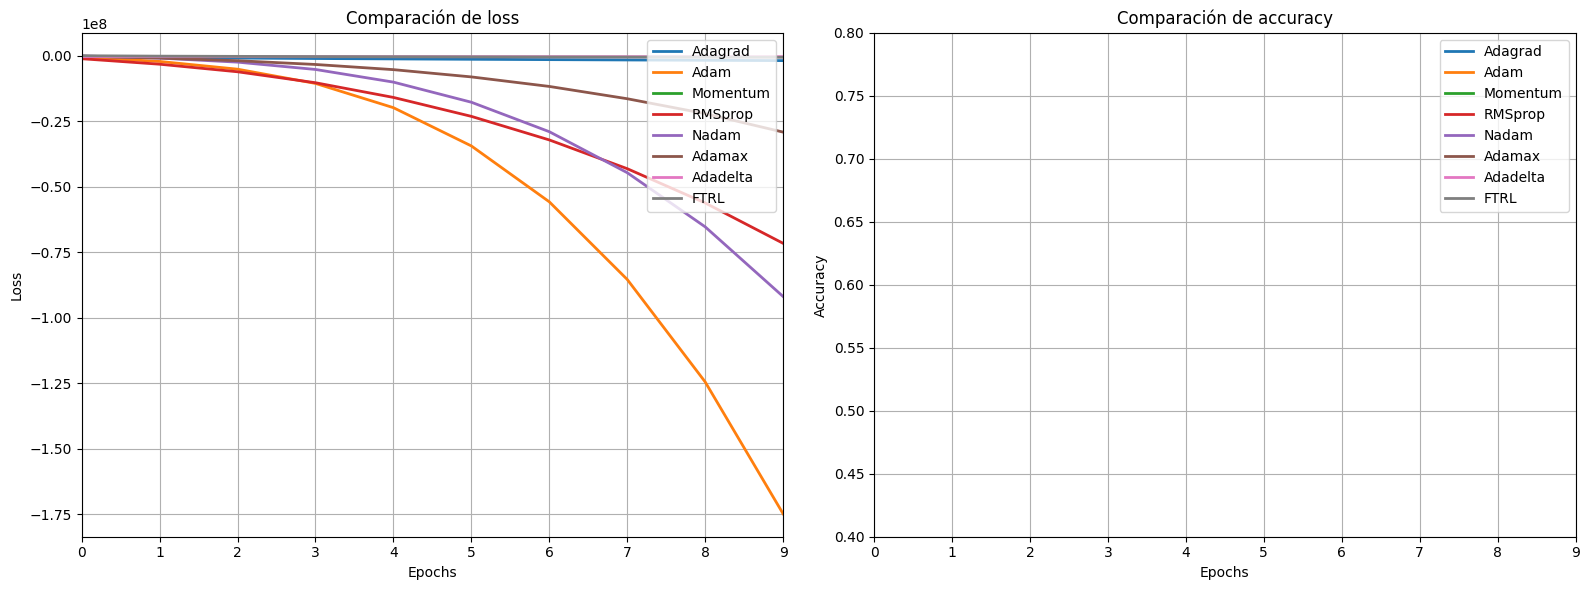

In [43]:
# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Métricas a graficar
metrics = ["loss", "accuracy"]

# Graficar resultados
for i, metric in enumerate(metrics):
    ax = axs[i]
    for name, history in histories.items():
        ax.plot(history.history[metric], label=f"{name}", linewidth=2)
    ax.grid()
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend(loc="upper right")
    ax.set_title(f"Comparación de {metric}")
    ax.set_xlim(0, len(history.history[metric]) - 1)

plt.tight_layout()
plt.axis([0, 9, 0.4, 0.8])
plt.show()

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
import mlflow
import mlflow.tensorflow

# Suponiendo que tienes tu DataFrame 'df' cargado
# Cargar los datos

# Variables de entrada (todas menos 'PUNT_GLOBAL')
X = df.drop(columns=['PUNT_GLOBAL'])
# Variable de salida
y = df['PUNT_GLOBAL']

# Columnas categóricas y numéricas
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numeric_columns = X.select_dtypes(include=['number']).columns.tolist()

# Preprocesamiento: OneHotEncoding para variables categóricas, escalado para numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Preprocesar los datos
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Convertir y_train y y_test a números flotantes
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Construir el modelo
def build_model(activation, neurons, input_shape):
    tf.random.set_seed(42)
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(neurons, activation=activation, kernel_initializer="he_normal"),
        tf.keras.layers.Dense(neurons // 2, activation=activation, kernel_initializer="he_normal"),
        tf.keras.layers.Dense(1)
    ])

def build_and_train_model(optimizer, activation, neurons):
    input_shape = (X_train.shape[1],)  # Asignar forma de entrada
    model = build_model(activation, neurons, input_shape)
    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mean_squared_error"])
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
    return history

learning_rate = 0.001

# Lista de optimizadores con learning rate 
optimizadores = {
    'Adagrad': tf.keras.optimizers.Adagrad(learning_rate=learning_rate),
    'Adam': tf.keras.optimizers.Adam(learning_rate=learning_rate),
    'Momentum': tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
    'Nadam': tf.keras.optimizers.Nadam(learning_rate=learning_rate),
    'Adamax': tf.keras.optimizers.Adamax(learning_rate=learning_rate),
    'Adadelta': tf.keras.optimizers.Adadelta(learning_rate=learning_rate),
    'FTRL': tf.keras.optimizers.Ftrl(learning_rate=learning_rate)
}

# Configurar experimento en MLflow
mlflow.set_experiment("Predicción Desempeño Saber 11")

# Entrenar el modelo y registrar con MLflow
histories = {}
for name, optimizer in optimizadores.items():
    with mlflow.start_run(run_name=name):
        mlflow.tensorflow.autolog()
        histories[name] = build_and_train_model(optimizer, "relu", 64)
        mlflow.log_param("optimizer", name)
        mlflow.log_param("activation", "relu")
        mlflow.log_param("neurons", 64)

# Para visualizar los experimentos, ejecuta en la terminal:
# mlflow ui




2024/05/27 18:45:35 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Epoch 1/10
 1/25 [>.............................] - ETA: 18s - loss: 65110.5156 - mean_squared_error: 65110.5156WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0023s vs `on_train_batch_end` time: 0.0052s). Check your callbacks.


25/25 [==============================] - 1s 27ms/step - loss: 72103.9688 - mean_squared_error: 72103.9688 - val_loss: 72166.9219 - val_mean_squared_error: 72166.9219
Epoch 2/10
15/25 [=================>............] - ETA: 0s - loss: 70706.4766 - mean_squared_error: 70706.4766

c:\Users\juanm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 0s 9ms/step - loss: 71586.3828 - mean_squared_error: 71586.3828 - val_loss: 71690.2969 - val_mean_squared_error: 71690.2969
Epoch 3/10
25/25 [==============================] - 0s 9ms/step - loss: 71107.3984 - mean_squared_error: 71107.3984 - val_loss: 71222.1562 - val_mean_squared_error: 71222.1562
Epoch 4/10
25/25 [==============================] - 0s 9ms/step - loss: 70635.2578 - mean_squared_error: 70635.2578 - val_loss: 70756.5156 - val_mean_squared_error: 70756.5156
Epoch 5/10
25/25 [==============================] - 0s 10ms/step - loss: 70164.9609 - mean_squared_error: 70164.9609 - val_loss: 70287.9609 - val_mean_squared_error: 70287.9609
Epoch 6/10
25/25 [==============================] - 0s 8ms/step - loss: 69691.0625 - mean_squared_error: 69691.0625 - val_loss: 69813.4844 - val_mean_squared_error: 69813.4844
Epoch 7/10
25/25 [==============================] - 0s 8ms/step - loss: 69210.5469 - mean_squared_error: 69210.5469 - val_loss: 69

INFO:tensorflow:Assets written to: C:\Users\juanm\AppData\Local\Temp\tmpvck1uc6p\model\data\model\assets


7/7 [==============================] - 0s 2ms/step


c:\Users\juanm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
2024/05/27 18:45:56 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Epoch 1/10
 1/25 [>.............................] - ETA: 21s - loss: 65160.7891 - mean_squared_error: 65160.7891WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0007s vs `on_train_batch_end` time: 0.0045s). Check your callbacks.


25/25 [==============================] - 1s 17ms/step - loss: 71675.4219 - mean_squared_error: 71675.4219 - val_loss: 70732.0781 - val_mean_squared_error: 70732.0781
Epoch 2/10
15/25 [=================>............] - ETA: 0s - loss: 68120.9844 - mean_squared_error: 68120.9844

c:\Users\juanm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 0s 10ms/step - loss: 67787.0234 - mean_squared_error: 67787.0234 - val_loss: 64360.8398 - val_mean_squared_error: 64360.8398
Epoch 3/10
25/25 [==============================] - 0s 9ms/step - loss: 58041.6055 - mean_squared_error: 58041.6055 - val_loss: 50545.1250 - val_mean_squared_error: 50545.1250
Epoch 4/10
25/25 [==============================] - 0s 8ms/step - loss: 40291.9688 - mean_squared_error: 40291.9688 - val_loss: 29318.3301 - val_mean_squared_error: 29318.3301
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 18597.0645 - mean_squared_error: 18597.0645 - val_loss: 8851.0527 - val_mean_squared_error: 8851.0527
Epoch 6/10
25/25 [==============================] - 0s 11ms/step - loss: 3668.3228 - mean_squared_error: 3668.3228 - val_loss: 669.3357 - val_mean_squared_error: 669.3357
Epoch 7/10
25/25 [==============================] - 0s 8ms/step - loss: 270.3709 - mean_squared_error: 270.3709 - val_loss: 158.0176 - va

INFO:tensorflow:Assets written to: C:\Users\juanm\AppData\Local\Temp\tmpnae00_87\model\data\model\assets


7/7 [==============================] - 0s 2ms/step


c:\Users\juanm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
2024/05/27 18:46:21 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Epoch 1/10
25/25 [==============================] - 1s 24ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/10
18/25 [====================>.........] - ETA: 0s - loss: nan - mean_squared_error: nan

c:\Users\juanm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/10
25/25 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 8/10
25/25 [==============================] - 0s 7ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val

INFO:tensorflow:Assets written to: C:\Users\juanm\AppData\Local\Temp\tmpvzo83rga\model\data\model\assets


7/7 [==============================] - 0s 2ms/step


ValueError: Input contains NaN.

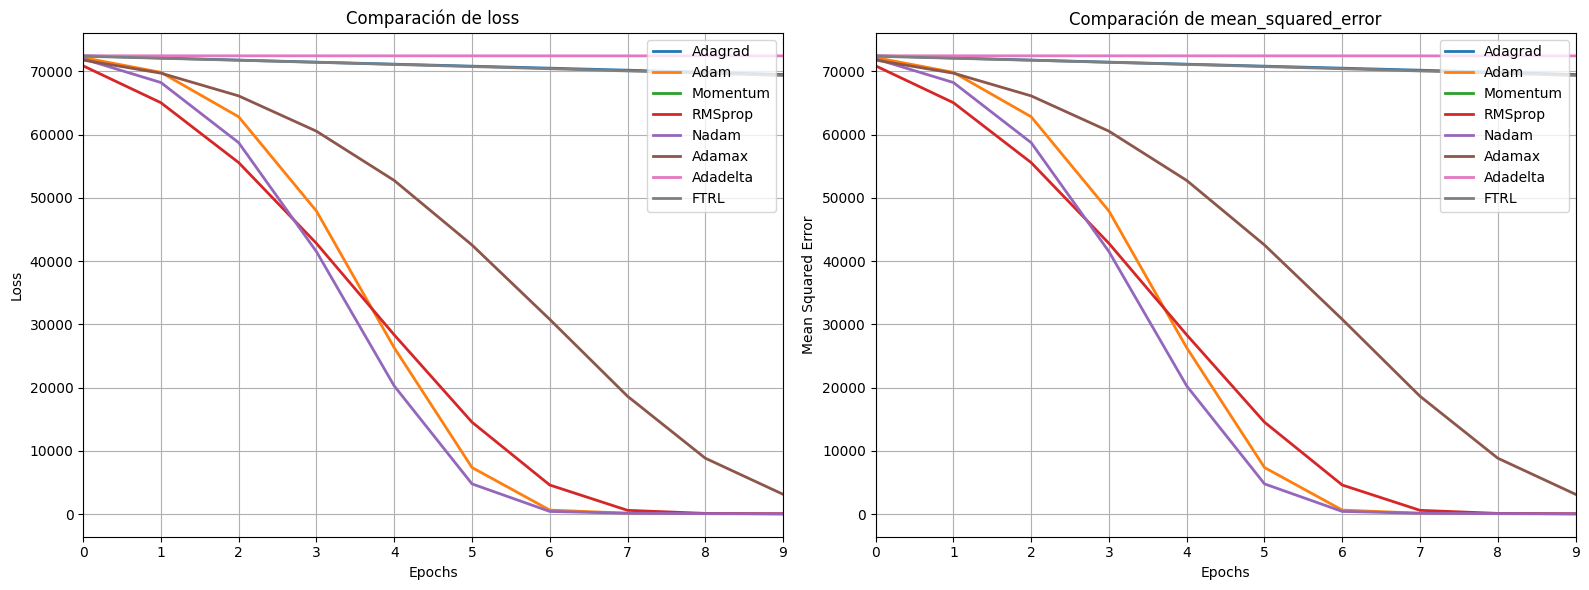

In [48]:
import matplotlib.pyplot as plt

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Métricas a graficar
metrics = ["loss", "mean_squared_error"]

# Graficar resultados
for i, metric in enumerate(metrics):
    ax = axs[i]
    for name, history in histories.items():
        ax.plot(history.history[metric], label=f"{name}", linewidth=2)
    ax.grid()
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend(loc="upper right")
    ax.set_title(f"Comparación de {metric}")
    ax.set_xlim(0, len(history.history[metric]) - 1)

plt.tight_layout()
plt.show()


Mas métricas